In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve

In [2]:
video = "/Bright_40cm"
video = "/Bright_60cm"
video = "/Dim_40cm"
video = "/Dim_60cm"

method = "/Otsu" 
method = "/Variable" 
method = "/External" 
method = "/Snake" 

In [3]:
#アノテーションデータ呼び出し
f = open("/work/Particle_Filter/Experiment" + video + "/Annotations/annotations.txt","rb")
y_true =np.array(pickle.load(f))
#予測データ呼び出し
f = open("/work/Particle_Filter/Experiment" + video + method + "/Ratio" + method +".txt","rb")
ratio = np.array(pickle.load(f))
ratio = np.array(ratio)
if method == "/Variable" or method == "/External":
    y_score = np.where(ratio<0.5,1,0)   #Variable , External
elif method == "/Otsu" :
    y_score = np.where(ratio<0.65,1,0)   #Otsu
elif method == "/Snake" :
    y_score = np.where(ratio<0.7,1,0)   #Snake
#F値算出
precision = precision_score(y_true,y_score)
recall = recall_score(y_true,y_score)
f_score_1 = 2*precision*recall/(precision+recall)
f_score_2 = f1_score(y_true,y_score)
#         print(f"手法{method} , 動画{video}")
print(f"Precission:{round(precision,3)} , Recall:{round(recall,3)} , f_score_2:{round(f_score_2,3)}")

Precission:0.421 , Recall:0.421 , f_score_2:0.421


In [4]:
#AUC算出
y_score = ratio.tolist()
roc = roc_curve(y_true, y_score)
print(type(roc))
print(len(roc))

<class 'tuple'>
3


In [5]:
fpr, tpr, thresholds = roc_curve(y_true, y_score)
print(fpr)
print(tpr)
print(thresholds)

[0.         0.         0.00343643 0.00343643 0.00515464 0.00515464
 0.00687285 0.00687285 0.00859107 0.01202749 0.01546392 0.02061856
 0.02405498 0.02920962 0.0395189  0.04123711 0.04639175 0.04982818
 0.0532646  0.0652921  0.06872852 0.0790378  0.08591065 0.08934708
 0.10309278 0.10824742 0.12542955 0.12714777 0.13058419 0.15463918
 0.15979381 0.16323024 0.16666667 0.1838488  0.19072165 0.21649485
 0.2233677  0.24570447 0.24914089 0.25085911 0.26460481 0.28522337
 0.28694158 0.29553265 0.3024055  0.30412371 0.34020619 0.34879725
 0.35910653 0.38316151 0.38659794 0.395189   0.40034364 0.41408935
 0.41580756 0.41924399 0.4347079  0.43814433 0.47594502 0.48281787
 0.49656357 0.51202749 0.51546392 0.52749141 0.57560137 0.5790378
 0.59621993 0.59793814 0.60309278 0.60652921 0.60824742 0.61168385
 0.64604811 0.64776632 0.65463918 0.65635739 0.6838488  0.68728522
 0.69415808 0.69931271 0.70103093 0.75945017 0.78350515 0.80068729
 0.81958763 0.82646048 0.83161512 0.83333333 0.84879725 0.85051

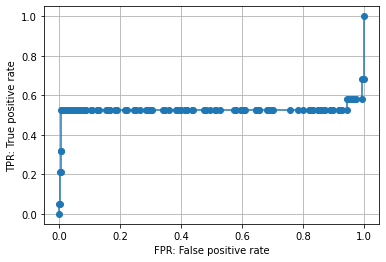

In [6]:
plt.plot(fpr, tpr, marker='o')
plt.xlabel('FPR: False positive rate')
plt.ylabel('TPR: True positive rate')
plt.grid()